Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target distribution: 1    357
0    212
Name: count, dtype: int64
Linear SVM Accuracy: 0.9561
RBF SVM Accuracy: 0.9737
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Confusion Matrix:
[[41  2]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                    

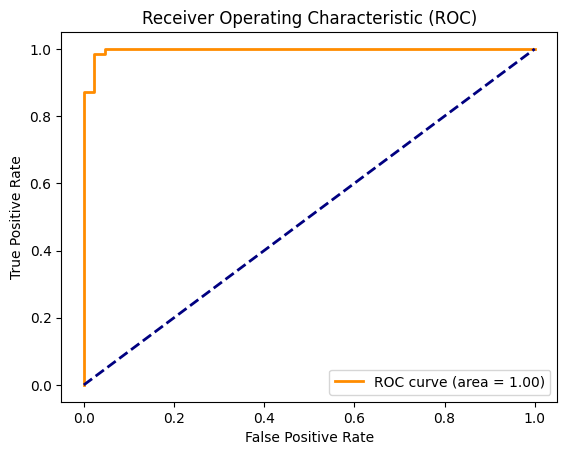

Model and Scaler saved successfully.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import joblib

# 1. Load dataset and inspect distribution
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Features: {data.feature_names}")
print(f"Target distribution: {pd.Series(y).value_counts()}")

# 2. Apply StandardScaler to normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Train baseline SVM with linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
print(f"Linear SVM Accuracy: {linear_svm.score(X_test, y_test):.4f}")

# 5. Train SVM with RBF kernel and compare
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
print(f"RBF SVM Accuracy: {rbf_svm.score(X_test, y_test):.4f}")

# 6. Use GridSearchCV to tune C and gamma values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)
print(f"Best Parameters: {grid.best_params_}")

# 7. Evaluate best model
grid_predictions = grid.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, grid_predictions))
print("\nClassification Report:")
print(classification_report(y_test, grid_predictions))

# 8. Plot ROC curve and calculate AUC score
y_score = grid.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)



plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 9. Save tuned model pipeline
# Creating a dictionary or simple list to save both for the deliverable
model_payload = {
    'scaler': scaler,
    'model': grid.best_estimator_
}
joblib.dump(model_payload, 'breast_cancer_svm_model.pkl')
print("Model and Scaler saved successfully.")